In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import random

In [34]:
df = pd.read_csv("MLDataset.csv",header = None)

In [35]:
# Create correlation matrix
'''corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]
# Drop features 
df_drop = df.drop(df[to_drop], axis=1)'''

'corr_matrix = df.corr().abs()\n\n# Select upper triangle of correlation matrix\nupper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))\n\n# Find index of feature columns with correlation greater than 0.95\nto_drop = [column for column in upper.columns if any(upper[column] > 0.5)]\n# Drop features \ndf_drop = df.drop(df[to_drop], axis=1)'

In [36]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 291].values

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1,shuffle = True, random_state=0)

In [38]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
y_train.shape

In [39]:
y_train = y_train.reshape((431))
#Labels=pd.get_dummies(y_train)

In [40]:
x.shape,y.shape,x_train.shape,y_train.shape,x_test.shape,y_test.shape

((539, 291), (539,), (431, 291), (431,), (108, 291), (108,))

In [41]:
#x_train = (x_train - x_train.mean()) / (x_train.std())
#x_test  = (x_test - x_train.mean()) /  (x_test.std())

In [42]:
def BGD(X, Y, theta, alpha, maxIterations):
    m, n = np.shape(X)
    added_X = np.ones((m, n+1))
    added_X[:,1:] = X
    Y = Y.reshape(m,1)
    for i in range(0, maxIterations):
        gradient = np.dot(added_X.transpose(), (np.dot(added_X, theta) - Y)) / m
        # print(gradient)
        theta = theta - alpha * gradient
    return theta

def SGD(X, Y, theta, alpha, maxIterations):
    m, n = np.shape(X)
    data = []
    for i in range(m):
        data.append(i)
    added_X = np.ones((m, n + 1))
    added_X[:, 1:] = X
    Y = Y.reshape(m, 1)

    for i in range(0,maxIterations):
        H = np.dot(added_X, theta)
        loss = H - Y
        index = random.randint(0,m-1)
        gradient = loss[index]*added_X[index]
        theta = theta - alpha * gradient.reshape(theta.shape[0],1)
    return theta

def predict(X, theta):
    m, n = np.shape(X)
    x_test = np.ones((m, n+1))
    x_test[:, 1:] = X
    res = np.dot(x_test, theta)
    return res

In [43]:
ratio = 0.7

m,n = np.shape(x_train)
#print(m)
#print(n)
theta = np.ones(n+1).reshape(n+1,1)
alpha = 0.001
maxIteration = 100000

theta_SGD = SGD(x_train, y_train, theta, alpha, maxIteration)

In [44]:
y_pred = predict(x_test,theta_SGD)

In [45]:
metrics.r2_score(y_test, y_pred)

0.5717591845663126

In [46]:
df_repre = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

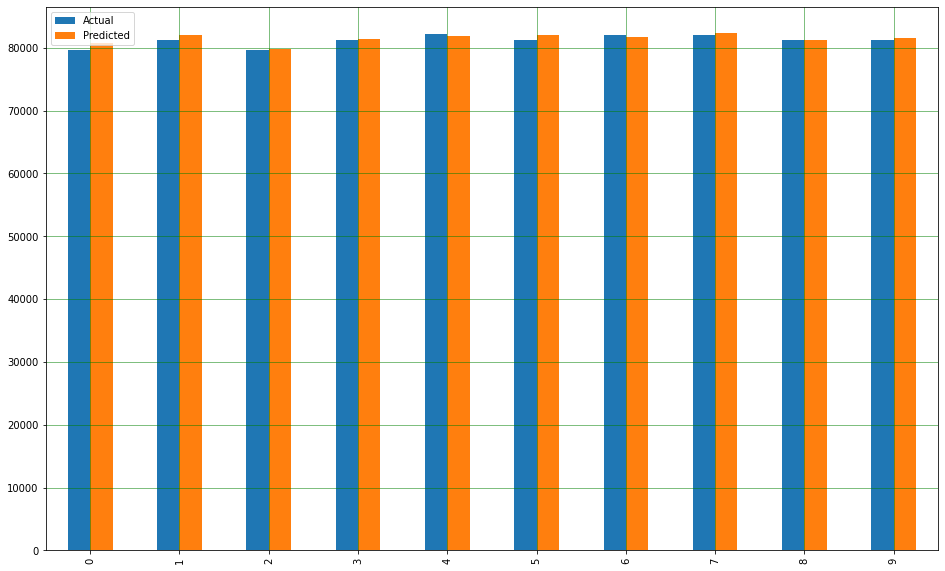

In [47]:
df1 = df_repre.head(10)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 509.54516675026537
Mean Squared Error: 377982.2455909037
Root Mean Squared Error: 614.8026070137502
